In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def informacion(df):
    rows = len(df)
    duplicates = df.duplicated().any()
    nan = df.isna().any()
    print(f"Cantidad de Regitros: {rows}\n")
    print(f"Hay valores duplicados? {duplicates}\n")
    print(f"Hay valores nulos?\n{nan}") 

# Integridad de los datos

### Customers Data

In [3]:
df_customers = pd.read_excel("data\CustomersData.xlsx")

In [4]:
df_customers.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [6]:
informacion(df_customers)

Cantidad de Regitros: 1468

Hay valores duplicados? False

Hay valores nulos?
CustomerID       False
Gender           False
Location         False
Tenure_Months    False
dtype: bool


In [7]:
for i in ["Gender", "Location"]:
    print(i + ":")
    print(df_customers[i].value_counts())
    print("----------------------")

Gender:
F    934
M    534
Name: Gender, dtype: int64
----------------------
Location:
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: Location, dtype: int64
----------------------


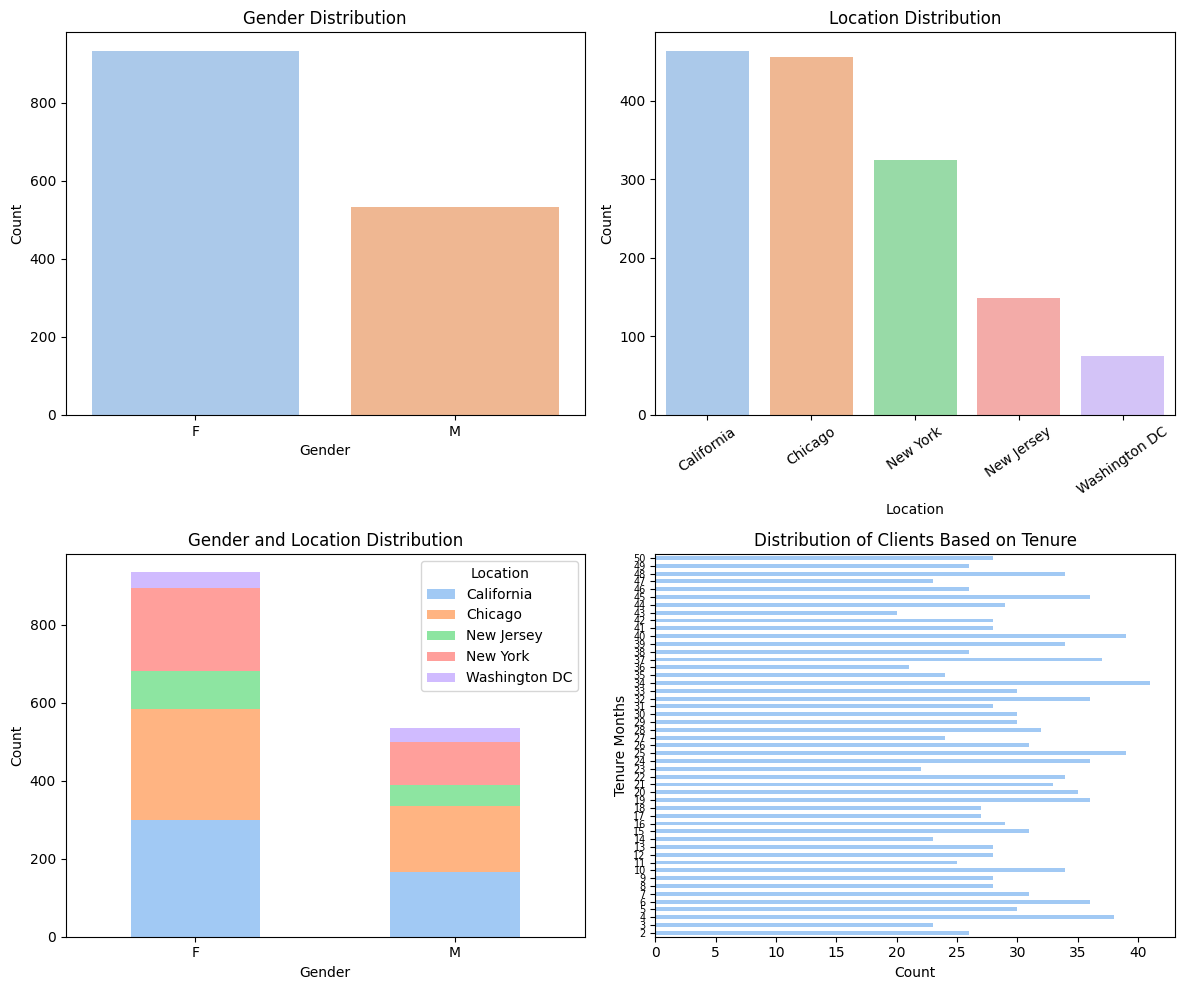

In [8]:
sns.set_palette("pastel")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Gender Distribution
gender_distribution = df_customers['Gender'].value_counts()
sns.barplot(x=gender_distribution.index, y=gender_distribution, hue=gender_distribution.index, ax=axes[0, 0])
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].tick_params(axis='x', rotation=0)

# Plot 2: Location Distribution
location_distribution = df_customers['Location'].value_counts()
sns.barplot(x=location_distribution.index, y=location_distribution, hue=location_distribution.index, ax=axes[0, 1])
axes[0, 1].set_xlabel('Location')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Location Distribution')
axes[0, 1].tick_params(axis='x', rotation=35)

# Plot 3: Gender and Location Distribution
gender_location_counts = df_customers.groupby(['Gender', 'Location']).size().unstack(fill_value=0)
gender_location_counts.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Gender and Location Distribution')
axes[1, 0].tick_params(axis='x', rotation=0)

# Plot 4: Distribution of Clients Based on Tenure
df_top_tenure = df_customers[["Tenure_Months", "CustomerID"]]
tenure_counts = df_top_tenure.groupby("Tenure_Months").count()
tenure_counts.plot(kind="barh", legend=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Tenure Months')
axes[1, 1].set_title('Distribution of Clients Based on Tenure')
axes[1, 1].tick_params(axis='y', labelsize=7)

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()

### Discount Coupon

In [9]:
df_discount = pd.read_csv("data\Discount_Coupon.csv")

In [10]:
df_discount.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [11]:
df_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [12]:
informacion(df_discount)

Cantidad de Regitros: 204

Hay valores duplicados? False

Hay valores nulos?
Month               False
Product_Category    False
Coupon_Code         False
Discount_pct        False
dtype: bool


In [13]:
for i in ["Product_Category", "Coupon_Code", "Month"]:
    print(i + ":")
    print(df_discount[i].value_counts())
    print("----------------------")

Product_Category:
Apparel                 12
Waze                    12
Notebooks & Journals    12
Gift Cards              12
Accessories             12
Housewares              12
Nest-Canada             12
Bottles                 12
Nest                    12
Nest-USA                12
Headgear                12
Notebooks               12
Bags                    12
Lifestyle               12
Drinkware               12
Office                  12
Android                 12
Name: Product_Category, dtype: int64
----------------------
Coupon_Code:
EXTRA10    8
EXTRA20    8
EXTRA30    8
SALE10     4
ACC20      4
BT20       4
BT30       4
NCA10      4
NCA20      4
NCA30      4
HOU10      4
HOU20      4
HOU30      4
ACC10      4
GC10       4
ACC30      4
WEMP30     4
GC20       4
GC30       4
NJ10       4
NJ20       4
NJ30       4
AND10      4
AND20      4
BT10       4
WEMP10     4
WEMP20     4
SALE20     4
SALE30     4
ELEC10     4
ELEC20     4
ELEC30     4
OFF10      4
OFF20      4
OFF30   

### Marketing Spends

In [14]:
df_marketing = pd.read_csv("data/Marketing_Spend.csv")

In [15]:
df_marketing.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [16]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [17]:
informacion(df_marketing)

Cantidad de Regitros: 365

Hay valores duplicados? False

Hay valores nulos?
Date             False
Offline_Spend    False
Online_Spend     False
dtype: bool


In [18]:
df_marketing["Total_Spend"] = df_marketing["Offline_Spend"] + df_marketing["Online_Spend"] 
df_marketing['Date'] = pd.to_datetime(df_marketing['Date'])

In [19]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
 3   Total_Spend    365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 11.5 KB


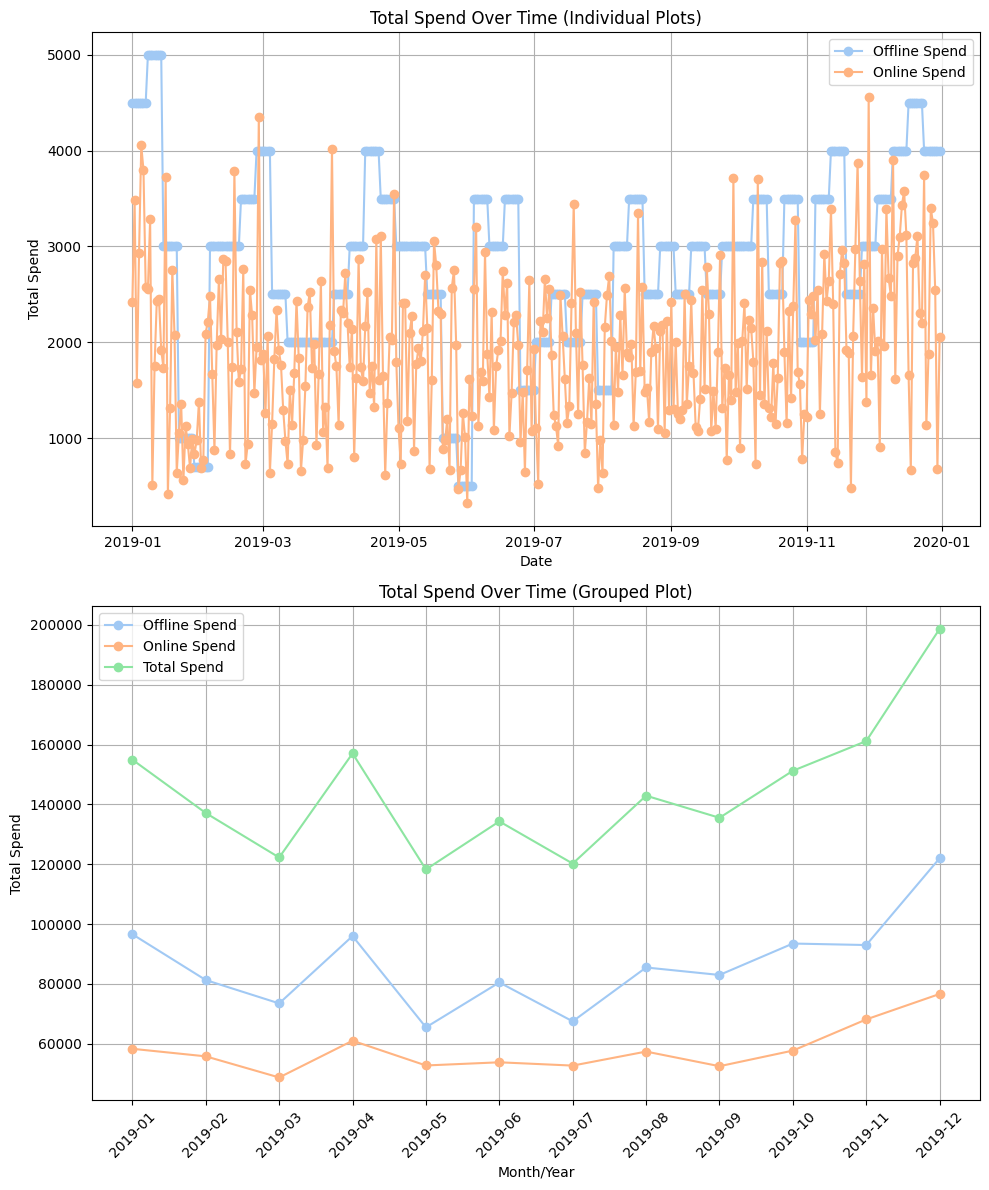

In [20]:
import matplotlib.pyplot as plt
# Grouping by month and plotting in a subplot
df_grouped = df_marketing.groupby(df_marketing['Date'].dt.to_period("M")).agg({
    'Offline_Spend': 'sum',
    'Online_Spend': 'sum',
    'Total_Spend': 'sum'}) 

# Create a subplot with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Line chart for each spend type
axs[0].plot(df_marketing['Date'], df_marketing['Offline_Spend'], marker='o', linestyle='-', label='Offline Spend')
axs[0].plot(df_marketing['Date'], df_marketing['Online_Spend'], marker='o', linestyle='-', label='Online Spend')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Total Spend')
axs[0].set_title('Total Spend Over Time (Individual Plots)')
axs[0].grid(True)
axs[0].legend()

# Plot 2: Grouped bar chart for total spend
axs[1].plot(df_grouped.index.astype(str), df_grouped['Offline_Spend'], marker='o', linestyle='-', label='Offline Spend')
axs[1].plot(df_grouped.index.astype(str), df_grouped['Online_Spend'], marker='o', linestyle='-', label='Online Spend')
axs[1].plot(df_grouped.index.astype(str), df_grouped['Total_Spend'], marker='o', linestyle='-', label='Total Spend')
axs[1].set_xlabel('Month/Year')
axs[1].set_ylabel('Total Spend')
axs[1].set_title('Total Spend Over Time (Grouped Plot)')
axs[1].grid(True)
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### Tax Amount

In [ ]:
df_tax = pd.read_excel("data/Tax_amount.xlsx")

In [ ]:
df_tax.head(20)

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [ ]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [ ]:
informacion(df_tax)

Cantidad de Regitros: 20

Hay valores duplicados? False

Hay valores nulos?
Product_Category    False
GST                 False
dtype: bool


### Online Sales

In [21]:
df_sales = pd.read_csv("data/Online_Sales.csv")

In [22]:
df_sales['Transaction_Date'] = pd.to_datetime(df_sales['Transaction_Date'])

In [23]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [24]:
informacion(df_sales)

Cantidad de Regitros: 52924

Hay valores duplicados? False

Hay valores nulos?
CustomerID             False
Transaction_ID         False
Transaction_Date       False
Product_SKU            False
Product_Description    False
Product_Category       False
Quantity               False
Avg_Price              False
Delivery_Charges       False
Coupon_Status          False
dtype: bool


In [25]:
for i in ["CustomerID", "Transaction_Date", "Product_SKU", "Product_Category", "Coupon_Status"]:
    print(i + ":")
    print(df_sales[i].value_counts().head(10))
    print("----------------------")

CustomerID:
12748    695
15311    587
14606    575
17841    572
14911    523
13089    366
15039    315
17850    297
14646    290
13081    261
Name: CustomerID, dtype: int64
----------------------
Transaction_Date:
2019-11-27    335
2019-07-13    311
2019-08-16    298
2019-08-02    292
2019-07-31    291
2019-08-11    289
2019-09-06    278
2019-12-18    274
2019-07-17    269
2019-08-22    264
Name: Transaction_Date, dtype: int64
----------------------
Product_SKU:
GGOENEBJ079499    3511
GGOENEBQ078999    3328
GGOENEBB078899    3230
GGOENEBQ079099    1361
GGOENEBQ084699    1089
GGOENEBQ079199    1065
GGOENEBQ086799     844
GGOEGFKQ020399     806
GGOENEBQ086499     599
GGOEGDHC018299     583
Name: Product_SKU, dtype: int64
----------------------
Product_Category:
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear            

In [26]:
df_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


## Calculate Invoice amount or sale_amount or revenue for each transaction and item level

- **Invoice Value:** *(( Quantity * Avg_price) (1 - Dicount_pct) * (1 + GST)) + Delivery_Charges*

In [27]:
df_sales['Transaction_Date'] = pd.to_datetime(df_sales['Transaction_Date'], format='%m/%d/%Y')
df_sales['Month'] = df_sales['Transaction_Date'].dt.strftime('%b')


In [28]:
df_aux1 = df_sales.drop(columns=["CustomerID", "Product_SKU", "Product_Description"])
result = pd.merge(df_aux1, df_discount, on=['Month', 'Product_Category'], how='left')
merged_df = pd.merge(result,df_tax,on=['Product_Category'], how = 'left')


In [29]:
merged_df["Coupon_Code"].fillna("NoCupon", inplace=True)
merged_df["Discount_pct"].fillna(0, inplace=True)


In [30]:
merged_df['Revenue'] = np.where(
    merged_df['Coupon_Status'] == 'Used',
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 - merged_df['Discount_pct']/100) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges'],
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges']
)


In [31]:
df_sales["Revenue"] = merged_df["Revenue"]

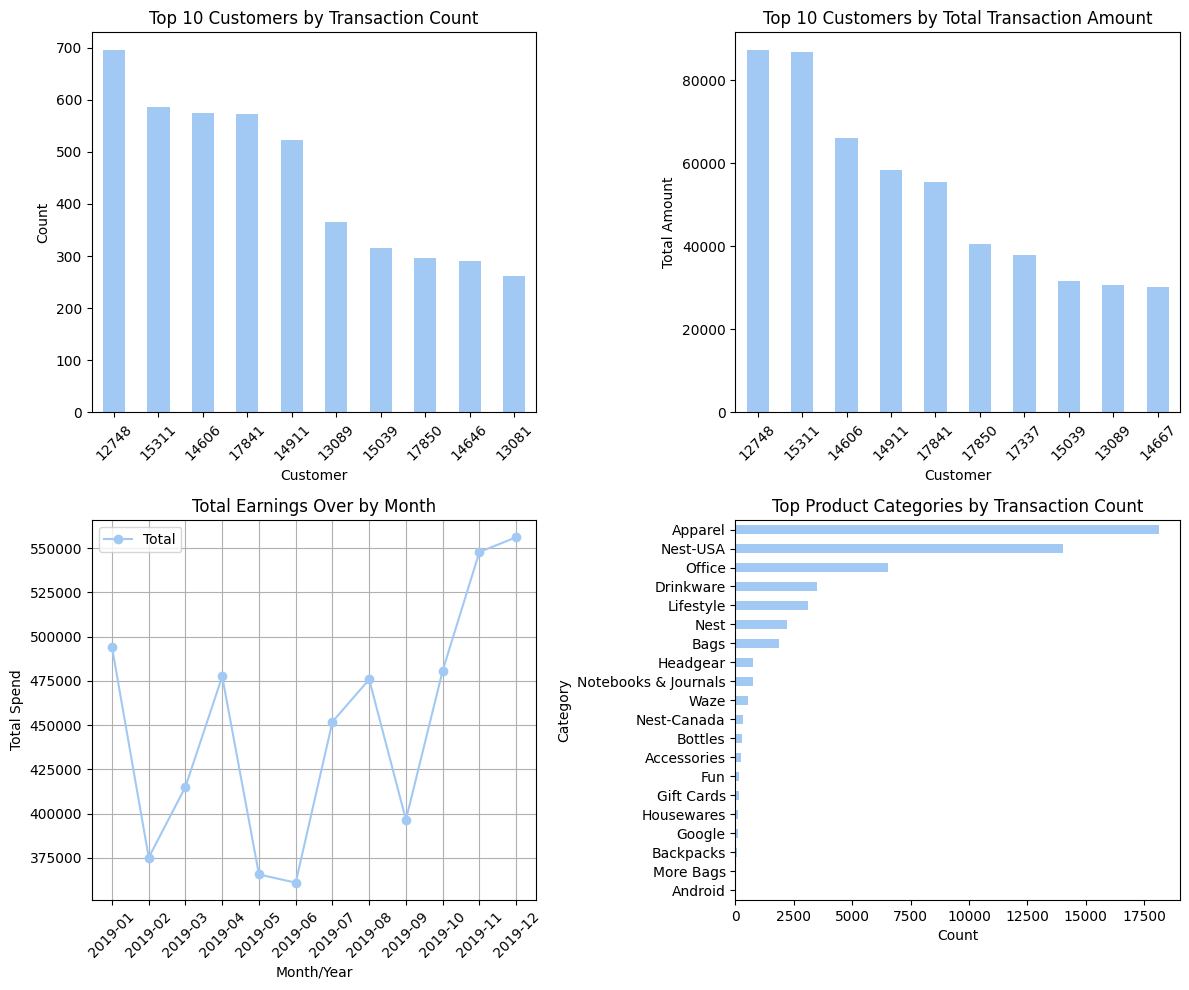

In [32]:
# Set up a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Top 10 Customers by Transaction Count
df_sales['CustomerID'].value_counts().head(10).plot(kind='bar', ax=axs[0,0])
axs[0, 0].set_xlabel('Customer')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Top 10 Customers by Transaction Count')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Top 10 Customers by Total Transaction Amount
customer_by_money = df_sales[['CustomerID', 'Revenue']]
customer_by_money.groupby(by='CustomerID').sum()['Revenue'].sort_values(ascending=False).head(10).plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_xlabel('Customer')
axs[0, 1].set_ylabel('Total Amount')
axs[0, 1].set_title('Top 10 Customers by Total Transaction Amount')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Total Earnings Over by Month
df_date_total = df_sales[['Transaction_Date', 'Revenue']]
df_date_total = df_date_total.groupby(df_date_total['Transaction_Date'].dt.to_period("M")).agg({
    'Revenue': 'sum'})
axs[1, 0].plot(df_date_total.index.astype(str), df_date_total['Revenue'], marker='o', linestyle='-', label='Total')
axs[1, 0].set_xlabel('Month/Year')
axs[1, 0].set_ylabel('Total Spend')
axs[1, 0].set_title('Total Earnings Over by Month')
axs[1, 0].grid(True)
axs[1, 0].legend()
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Top Product Categories by Transaction Count
df_sales['Product_Category'].value_counts(ascending=True).plot(kind='barh', ax=axs[1, 1])
axs[1, 1].set_xlabel('Count')
axs[1, 1].set_ylabel('Category')
axs[1, 1].set_title('Top Product Categories by Transaction Count')

# Adjust layout
plt.tight_layout()
plt.show()

# Business Objective:
The e-commerce company is expecting below analysis using the data

## Perform Detailed exploratory analysis
- Understanding how many customers acquired every month

In [46]:
distinct_count = df_sales.groupby("Month")['CustomerID'].nunique()

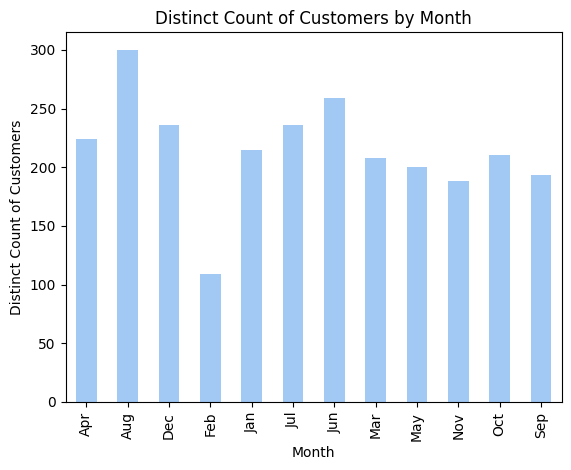

In [48]:
distinct_count.plot(kind="bar")
plt.xlabel('Month')
plt.ylabel('Distinct Count of Customers')
plt.title('Distinct Count of Customers by Month')
plt.show()

- Understand the retention of customers on month on month basis

In [49]:
import datetime as dt
#funcion for month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [50]:
df_sales["Month"] = df_sales["Transaction_Date"].apply(get_month)
#  creamos una columna con el valor minimo de mes (o el mes en que el cliente hizo su primer compra)
df_sales["Cohort Month"] = df_sales.groupby("CustomerID")["Month"].transform('min')

# creando una funcion para sacar la diferencia entre fehcas

def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    
    return day, month, year


_, invoice_month, invoice_year = get_date_elements(df_sales, "Month")
_, cohort_month, cohort_year = get_date_elements(df_sales, "Cohort Month")


# Creando un index para la cohorte

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
df_sales["CohortIndex"] = year_diff * 12 + month_diff + 1

cohort_data = df_sales.groupby(["Cohort Month", "CohortIndex"])["CustomerID"].apply(pd.Series.nunique)

cohort_table = cohort_data.pivot(index="Cohort Month", columns=["CohortIndex"], values="CustomerID")


In [51]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis=0)
new_cohort_table.index = new_cohort_table.index.strftime("%B") 
plt.figure(figsize=(15, 8))
sns.heatmap(new_cohort_table, annot=True, cmap="magma", fmt=".0%")
plt.show()

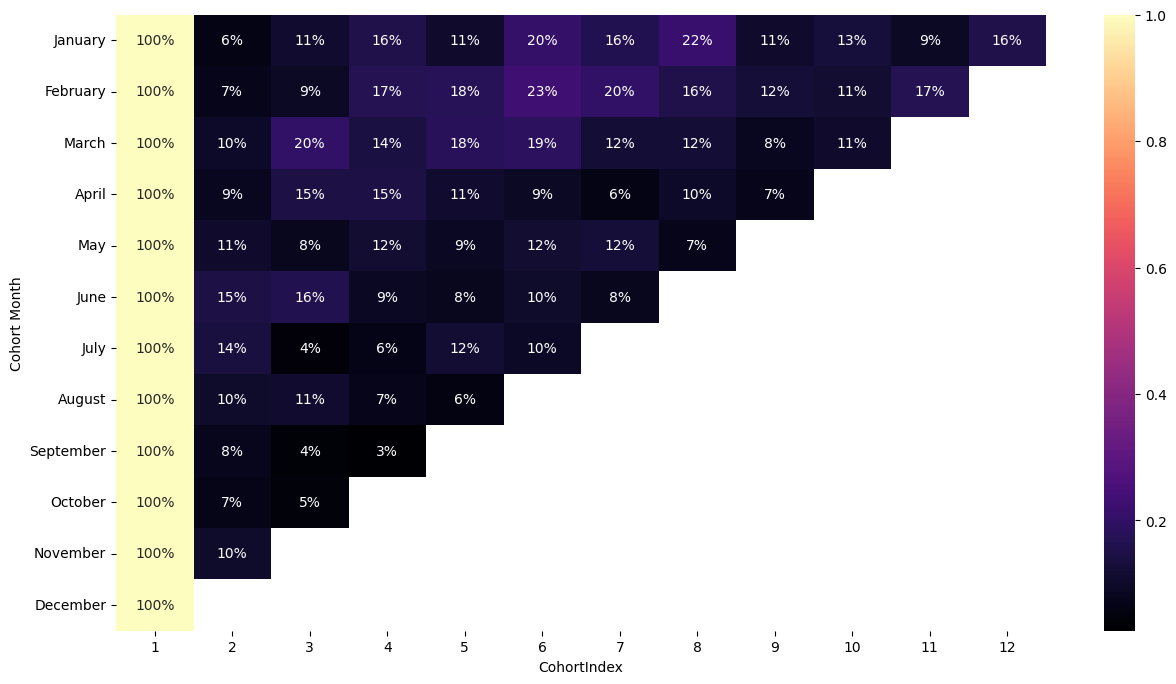